In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('seaborn-notebook')

import warnings
warnings.filterwarnings('ignore')

# Introduction

**Netflix**

Netflix is one of the world's leading entertainment services with 214 million paid memberships in over 190 countries enjoying TV series, documentaries and feature films across a wide variety of genres and languages. Members can watch as much as they want, anytime, anywhere, on any internet-connected screen. Members can play, pause and resume watching, all without commercials or commitments. [(1)](https://ir.netflix.net/ir-overview/profile/default.aspx)

**Disney Plus**

Disney Plus is an on-demand, ad-free streaming service created by The Walt Disney Company.

With Disney Plus, subscribers can watch thousands of Disney movies and series on their devices (smart TVs, phones, laptops, tablets, and gaming consoles). The service includes unlimited downloads so you can watch anywhere, anytime. 

Disney Plus content comes from Walt Disney Studios' and Walt Disney Television's biggest names: Disney, Pixar, Marvel, Star Wars, National Geographic, and 20th Century Fox. [(2)](https://www.businessinsider.com/disney-plus)


#Contents of This Notebook

1. [Analysing the Data](#1)
1. [EDA Using Pie Chart](#2)
1. [EDA Using Barplot](#3)
1. [Where it's available? EDA using Maps](#4)
1. [Conclusion](#5)


<a id='1'></a>
## Analyzing the Data

In [2]:
df = pd.read_csv('../input/disney-movies-and-tv-shows/disney_plus_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [3]:
df = df.iloc[:,1:]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          1450 non-null   object
 1   title         1450 non-null   object
 2   director      977 non-null    object
 3   cast          1260 non-null   object
 4   country       1231 non-null   object
 5   date_added    1447 non-null   object
 6   release_year  1450 non-null   int64 
 7   rating        1447 non-null   object
 8   duration      1450 non-null   object
 9   listed_in     1450 non-null   object
 10  description   1450 non-null   object
dtypes: int64(1), object(10)
memory usage: 124.7+ KB


In [5]:
df.isnull().sum()

type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [6]:
data = pd.read_csv('../input/netflix-shows/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
data = data.iloc[:,1:]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [9]:
data.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<a id='2'></a>
## EDA Using Pie Chart

### The Ratio of Movie to the TV Shows

In [10]:
df_d = df['type'].value_counts()

fig = px.pie(df_d,
       names = df_d.index,
       values = df_d.values,
       hole = 0.4,
       title = 'Data Ratio for Movies and TV Shows for Disney',
       color_discrete_sequence = ['#ffa500', 'green'])


fig.show()

In [11]:
data_d = data['type'].value_counts()

fig = px.pie(data_d,
       names = data_d.index,
       values = data_d.values,
       hole = 0.4,
       title = 'Data Ratio for Movies and TV Shows for Netflix',
       color_discrete_sequence = ['#ffa500', 'green'])


fig.show()

------------------------------

### Are the Content are New?

In [12]:
df_d = df.dropna(subset = ['date_added'])
df_d.date_added = pd.to_datetime(df_d.date_added)

In [13]:
threshold = 2000
new_content = df_d[df_d.release_year > threshold]
old_content = df_d[df_d.release_year < threshold]

df_x = pd.DataFrame()
df_x['New-Old'] = ['new_content','old_content']
df_x['Number_of_Content'] = [len(new_content), len(old_content)]

fig = px.pie(df_x, names = ['New Content', 'Old Content'],
       values = 'Number_of_Content',
       color_discrete_sequence = ['#ffa500','green'],
       )

fig.update_layout(title = 'The Ratio of New Content to Old Content for Disney')
fig.show()


In [14]:
data_d = data.dropna(subset = ['date_added'])
data_d.date_added = pd.to_datetime(data_d.date_added)

threshold = 2000
new_content = data_d[data_d.release_year > threshold]
old_content = data_d[data_d.release_year < threshold]

df_x = pd.DataFrame()
df_x['New-Old'] = ['new_content','old_content']
df_x['Number_of_Content'] = [len(new_content), len(old_content)]

fig = px.pie(df_x, names = ['New Content', 'Old Content'],
       values = 'Number_of_Content',
       color_discrete_sequence = ['#ffa500','green'],
       )

fig.update_layout(title = 'The Ratio of New Content to Old Content for Netflix')
fig.show()

----------------------------------------------------------

<a id='3'></a>
## EDA Using Barplots

### Content Added to Platform in Years

In [15]:
df_d['year_added'] = df_d.date_added.apply(lambda x: x.year)

In [16]:
colors = {'Movie' : 'Green',
          'TV Show': '#ffa500'}
colors

{'Movie': 'Green', 'TV Show': '#ffa500'}

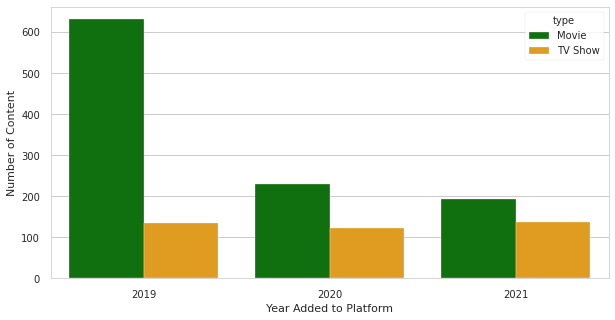

In [17]:
plt.figure(figsize = (10,5))
sns.countplot(df_d['year_added'], 
              hue = df_d['type'],
              palette = colors)
plt.xlabel('Year Added to Platform')
plt.ylabel('Number of Content')
plt.show()

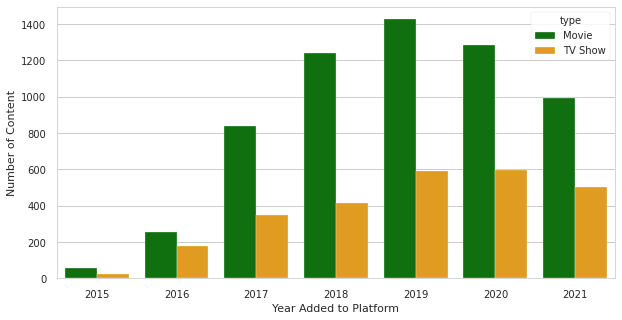

In [18]:
data_d['year_added'] = data_d.date_added.apply(lambda x: x.year)
plt.figure(figsize = (10,5))
data_dx = data_d[data_d.year_added >= 2015]
sns.countplot(data_dx['year_added'], 
              hue = data_dx['type'],
              palette = colors)
plt.xlabel('Year Added to Platform')
plt.ylabel('Number of Content')
plt.show()

------------------------------------------------

### Content Availability for Different Countries

In [19]:
country_list = df_d.country[df_d.country.notnull()].tolist()

unique_countries = []

for i in country_list:
  country = i.split(', ')
  for j in country:
    if j not in unique_countries:
      unique_countries.append(j)

for i in unique_countries:
  df_d[str(i)] = df_d.country.dropna().apply(lambda x: 1 if str(i) in ' '.join(x.split()) else 0)

for i in unique_countries:
  df_d[i] = df_d[i].fillna(0)

In [20]:
count_dict = dict()
for i in unique_countries:
  count_dict[i] = df_d[i].sum(axis = 0)

count_dict

{'United States': 1182.0,
 'Canada': 76.0,
 'Australia': 23.0,
 'United Kingdom': 101.0,
 'South Korea': 13.0,
 'Ireland': 8.0,
 'Denmark': 3.0,
 'Spain': 4.0,
 'Poland': 2.0,
 'Hungary': 3.0,
 'France': 22.0,
 'Japan': 10.0,
 'Germany': 9.0,
 'India': 5.0,
 'Singapore': 2.0,
 'Thailand': 1.0,
 'China': 10.0,
 'Brazil': 1.0,
 'Belgium': 1.0,
 'Austria': 2.0,
 'South Africa': 3.0,
 'Hong Kong': 4.0,
 'Argentina': 3.0,
 'United Arab Emirates': 2.0,
 'Mexico': 4.0,
 'Switzerland': 1.0,
 'Taiwan': 6.0,
 'Philippines': 2.0,
 'Tanzania': 1.0,
 'Panama': 1.0,
 'Angola': 1.0,
 'Botswana': 1.0,
 'Namibia': 1.0,
 'Luxembourg': 1.0,
 'Guatemala': 1.0,
 'Russia': 1.0,
 'Malaysia': 2.0,
 'Kazakhstan': 1.0,
 'Syria': 1.0,
 'Iran': 1.0,
 'Egypt': 1.0,
 'Pakistan': 1.0,
 'New Zealand': 3.0,
 'Norway': 1.0,
 'Sweden': 1.0,
 'Slovenia': 1.0,
 'Czech Republic': 1.0}

In [21]:
countries = [country for country in count_dict.keys()]
vals = [values for values in count_dict.values()]

df_ = pd.DataFrame()
df_['Country'] = countries
df_['Values'] = vals
df_ = df_.sort_values(by = 'Values',ascending = False)[:10]

fig = px.bar(df_,
            x = 'Country',
            y = 'Values',
             color = 'Values',
             color_continuous_scale = px.colors.diverging.Earth
            )
fig.update_layout(title = 'Top 10 Countries Having the Most Content for Disney')
fig.show()

In [22]:
country_list = data_d.country[data_d.country.notnull()].tolist()

unique_countries = []

for i in country_list:
  country = i.split(', ')
  for j in country:
    if j not in unique_countries:
      unique_countries.append(j)

for i in unique_countries:
  data_d[str(i)] = data_d.country.dropna().apply(lambda x: 1 if str(i) in ' '.join(x.split()) else 0)

for i in unique_countries:
  data_d[i] = data_d[i].fillna(0)

count_dict = dict()
for i in unique_countries:
  count_dict[i] = data_d[i].sum(axis = 0)

count_dict.pop('')

7967.0

In [23]:
count_dict

{'United States': 3684.0,
 'South Africa': 62.0,
 'India': 1046.0,
 'Ghana': 5.0,
 'Burkina Faso': 1.0,
 'United Kingdom': 805.0,
 'Germany': 231.0,
 'Ethiopia': 1.0,
 'Czech Republic': 22.0,
 'Mexico': 169.0,
 'Turkey': 113.0,
 'Australia': 159.0,
 'France': 393.0,
 'Finland': 11.0,
 'China': 162.0,
 'Canada': 445.0,
 'Japan': 317.0,
 'Nigeria': 103.0,
 'Spain': 232.0,
 'Belgium': 90.0,
 'South Korea': 231.0,
 'Singapore': 41.0,
 'Italy': 100.0,
 'Romania': 14.0,
 'Argentina': 91.0,
 'Venezuela': 4.0,
 'Hong Kong': 105.0,
 'Russia': 27.0,
 'Ireland': 46.0,
 'Nepal': 2.0,
 'New Zealand': 33.0,
 'Brazil': 97.0,
 'Greece': 11.0,
 'Jordan': 9.0,
 'Colombia': 52.0,
 'Switzerland': 19.0,
 'Israel': 30.0,
 'Taiwan': 89.0,
 'Bulgaria': 10.0,
 'Algeria': 3.0,
 'Poland': 41.0,
 'Saudi Arabia': 13.0,
 'Thailand': 70.0,
 'Indonesia': 90.0,
 'Egypt': 117.0,
 'Denmark': 48.0,
 'Kuwait': 8.0,
 'Netherlands': 50.0,
 'Malaysia': 26.0,
 'Vietnam': 7.0,
 'Hungary': 11.0,
 'Sweden': 42.0,
 'Lebanon': 31.

In [24]:
countries = [country for country in count_dict.keys()]
vals = [values for values in count_dict.values()]

df_ = pd.DataFrame()
df_['Country'] = countries
df_['Values'] = vals
df_ = df_.sort_values(by = 'Values',ascending = False)[:10]

fig = px.bar(df_,
            x = 'Country',
            y = 'Values',
             color = 'Values',
             color_continuous_scale = px.colors.diverging.Earth
            )
fig.update_layout(title = 'Top 10 Countries Having the Most Content for Netflix')
fig.show()

-------------------------------------------------

### Types of Content in Platforms

In [25]:
content_type_list = df_d.listed_in[df_d.listed_in.notnull()].tolist()

unique_type = []

for i in content_type_list:
  content = i.split(', ')
  for j in content:
    if j not in unique_type:
      unique_type.append(j)

for i in unique_type:
  df_d[str(i)] = df_d.listed_in.dropna().apply(lambda x: 1 if str(i) in ' '.join(x.split()) else 0)

for i in unique_type:
  df_d[i] = df_d[i].fillna(0)

In [26]:
count_type_dict = dict()
for i in unique_type:
  count_type_dict[i] = df_d[i].sum(axis = 0)

count_type_dict

{'Animation': 542,
 'Family': 632,
 'Comedy': 524,
 'Musical': 44,
 'Docuseries': 122,
 'Historical': 53,
 'Music': 87,
 'Biographical': 41,
 'Documentary': 174,
 'Action-Adventure': 450,
 'Superhero': 19,
 'Reality': 26,
 'Survival': 9,
 'Animals & Nature': 208,
 'Kids': 140,
 'Coming of Age': 204,
 'Drama': 134,
 'Fantasy': 192,
 'Lifestyle': 8,
 'Movies': 3,
 'Science Fiction': 90,
 'Concert Film': 7,
 'Crime': 16,
 'Sports': 43,
 'Anthology': 28,
 'Medical': 6,
 'Variety': 12,
 'Spy/Espionage': 3,
 'Buddy': 40,
 'Parody': 9,
 'Game Show / Competition': 10,
 'Romance': 20,
 'Anime': 4,
 'Romantic Comedy': 2,
 'Thriller': 5,
 'Police/Cop': 1,
 'Talk Show': 1,
 'Western': 7,
 'Dance': 6,
 'Series': 3,
 'Mystery': 12,
 'Soap Opera / Melodrama': 2,
 'Disaster': 2,
 'Travel': 1}

In [27]:
df_ = pd.DataFrame()
df_['Content'] = list(count_type_dict.keys())
df_['Values'] = list(count_type_dict.values())
df_ = df_.sort_values(by = 'Values',ascending = False)[:10]

fig = px.bar(df_,
            x = 'Content',
            y = 'Values',
             color = 'Values',
             color_continuous_scale = px.colors.diverging.Earth
            )
fig.update_layout(title = 'Top 10 Types of Content in Disney Platform')
fig.show()

In [28]:
data_d.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,...,Jamaica,Kazakhstan,Lithuania,Afghanistan,Somalia,Sudan,Panama,Uganda,East Germany,Montenegro
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
content_type_list = data_d.listed_in[data_d.listed_in.notnull()].tolist()

unique_type = []

for i in content_type_list:
  content = i.split(', ')
  for j in content:
    if j not in unique_type:
      unique_type.append(j)

for i in unique_type:
  data_d[str(i)] = data_d.listed_in.dropna().apply(lambda x: 1 if str(i) in ' '.join(x.split()) else 0)

for i in unique_type:
  data_d[i] = data_d[i].fillna(0)

In [30]:
count_type_dict = dict()
for i in unique_type:
  count_type_dict[i] = data_d[i].sum(axis = 0)

count_type_dict

{'Documentaries': 869,
 'International TV Shows': 1350,
 'TV Dramas': 762,
 'TV Mysteries': 98,
 'Crime TV Shows': 469,
 'TV Action & Adventure': 167,
 'Docuseries': 394,
 'Reality TV': 255,
 'Romantic TV Shows': 370,
 'TV Comedies': 574,
 'TV Horror': 75,
 'Children & Family Movies': 641,
 'Dramas': 3189,
 'Independent Movies': 756,
 'International Movies': 2752,
 'British TV Shows': 252,
 'Comedies': 2248,
 'Spanish-Language TV Shows': 173,
 'Thrillers': 634,
 'Romantic Movies': 616,
 'Music & Musicals': 375,
 'Horror Movies': 357,
 'Sci-Fi & Fantasy': 326,
 'TV Thrillers': 57,
 "Kids' TV": 449,
 'Action & Adventure': 1026,
 'TV Sci-Fi & Fantasy': 83,
 'Classic Movies': 116,
 'Anime Features': 71,
 'Sports Movies': 219,
 'Anime Series': 175,
 'Korean TV Shows': 151,
 'Science & Nature TV': 92,
 'Teen TV Shows': 69,
 'Cult Movies': 71,
 'TV Shows': 1752,
 'Faith & Spirituality': 65,
 'LGBTQ Movies': 102,
 'Stand-Up Comedy': 399,
 'Movies': 4502,
 'Stand-Up Comedy & Talk Shows': 56,
 '

In [31]:
df_ = pd.DataFrame()
df_['Content'] = list(count_type_dict.keys())
df_['Values'] = list(count_type_dict.values())
df_ = df_.sort_values(by = 'Values',ascending = False)[:10]

fig = px.bar(df_,
            x = 'Content',
            y = 'Values',
             color = 'Values',
             color_continuous_scale = px.colors.diverging.Earth
            )
fig.update_layout(title = 'Top 10 Types of Content in Disney Platform')
fig.show()

--------------------------------------

<a id='4'></a>
## Where it's available? EDA using Maps 

In [32]:
country_list = df_d.country[df_d.country.notnull()].tolist()

unique_countries = []

for i in country_list:
  country = i.split(', ')
  for j in country:
    if j not in unique_countries:
      unique_countries.append(j)

for i in unique_countries:
  df_d[str(i)] = df_d.country.dropna().apply(lambda x: 1 if str(i) in ' '.join(x.split()) else 0)

for i in unique_countries:
  df_d[i] = df_d[i].fillna(0)

In [33]:
count_dict = dict()
for i in unique_countries:
  count_dict[i] = df_d[i].sum(axis = 0)

countries = [country for country in count_dict.keys()]
vals = [values for values in count_dict.values()]

df_ = pd.DataFrame()
df_['Country'] = countries
df_['Values'] = vals
df_ = df_.sort_values(by = 'Values',ascending = False)

In [34]:
fig = px.choropleth(df_,
                    locations = unique_countries,
              locationmode = 'country names',
              color = 'Values',
              color_continuous_scale = px.colors.sequential.Burgyl)

fig.update_layout(title = 'Disney Plus Content Availability in Countries')

fig.show()

In [35]:
country_list = data_d.country[data_d.country.notnull()].tolist()

unique_countries = []

for i in country_list:
  country = i.split(', ')
  for j in country:
    if j not in unique_countries:
      unique_countries.append(j)

for i in unique_countries:
  data_d[str(i)] = data_d.country.dropna().apply(lambda x: 1 if str(i) in ' '.join(x.split()) else 0)

for i in unique_countries:
  data_d[i] = data_d[i].fillna(0)

count_dict = dict()
for i in unique_countries:
  count_dict[i] = data_d[i].sum(axis = 0)

count_dict.pop('')

7967.0

In [36]:
countries = [country for country in count_dict.keys()]
vals = [values for values in count_dict.values()]

df_ = pd.DataFrame()
df_['Country'] = countries
df_['Values'] = vals
df_ = df_.sort_values(by = 'Values',ascending = False)

fig = px.choropleth(df_,
                    locations = 'Country',
              locationmode = 'country names',
              color = 'Values',
              color_continuous_scale = px.colors.sequential.Burgyl)

fig.update_layout(title = 'Netflix Content Availability in Countries')

fig.show()

-----------------------------------------------

<a id='5'></a>
# Conclusion

Netflix and Disney Plus are two competitve companies in entertainment industry.
This work shows that:

1. Netflix has more content and the content is more available in non US countries.

2. If we consider the content which was released after 2000 as "new", Netflix has more uptodate content compared to the Disney Plus.

3. Both platforms have similar ratios of Movies to TV Shows.

4. Netflix relies more on Movies and Disney Plus relies more on Family Content.